In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_score,f1_score,recall_score

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/LOAN_APPROVAL _PREDICTION.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
948,LP002606,Female,No,0,Graduate,No,3159,0.0,100.0,360.0,1.0,Semiurban,Y
949,LP002615,Male,Yes,2,Graduate,No,4865,5625.0,208.0,360.0,1.0,Semiurban,Y
950,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural,N
951,LP002619,Male,Yes,0,Not Graduate,No,3814,1484.0,124.0,300.0,1.0,Semiurban,Y
952,LP002622,Male,Yes,2,Graduate,No,3510,4414.0,243.0,360.0,1.0,Rural,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            953 non-null    object 
 1   Gender             929 non-null    object 
 2   Married            949 non-null    object 
 3   Dependents         930 non-null    object 
 4   Education          953 non-null    object 
 5   Self_Employed      903 non-null    object 
 6   ApplicantIncome    953 non-null    int64  
 7   CoapplicantIncome  953 non-null    float64
 8   LoanAmount         921 non-null    float64
 9   Loan_Amount_Term   935 non-null    float64
 10  Credit_History     872 non-null    float64
 11  Property_Area      953 non-null    object 
 12  Loan_Status        953 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 96.9+ KB


In [ ]:
df.shape

(953, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,953.000000,953.000000,921.000000,935.000000,872.000000
mean,5433.144806,1671.703085,146.163952,340.979679,0.829128
std,6288.391469,3164.094759,84.654966,65.987724,0.376613
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2873.000000,0.000000,100.000000,360.000000,1.000000
50%,3775.000000,1250.000000,128.000000,360.000000,1.000000
75%,5818.000000,2306.000000,166.000000,360.000000,1.000000
max,81002.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               24
Married               4
Dependents           23
Education             0
Self_Employed        50
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           32
Loan_Amount_Term     18
Credit_History       81
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: ylabel='None'>

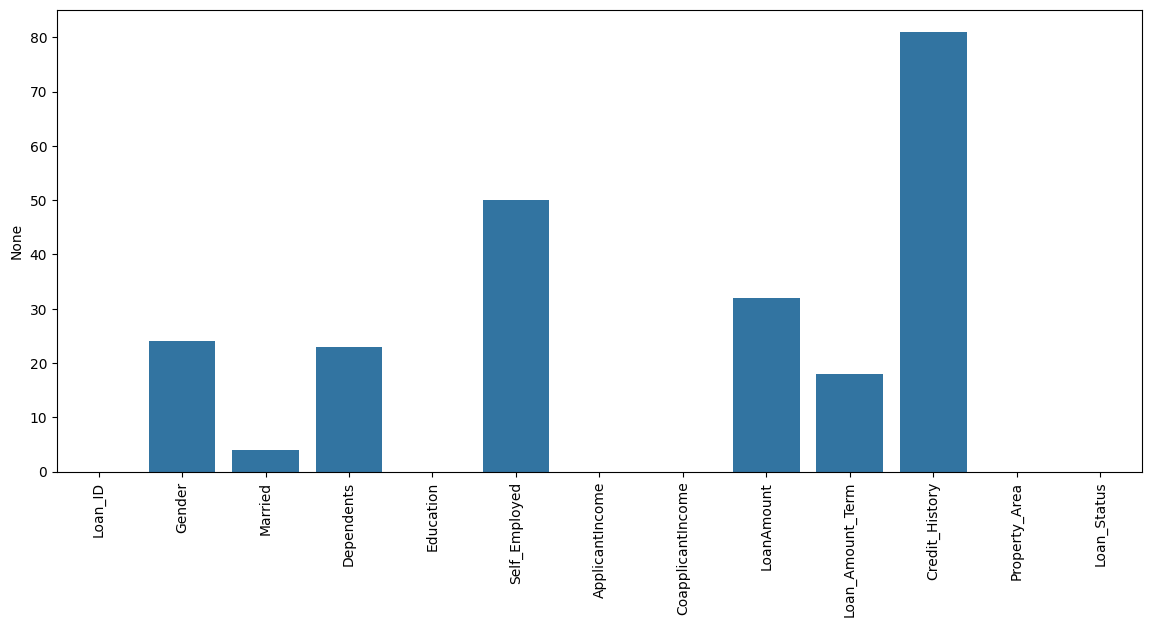

In [ ]:
# @title Data Exploration Analysis for each attribute in dataset

plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.barplot(x=[col for col in df.columns],y=df.isna().sum())

In [ ]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      508
CoapplicantIncome    289
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
df.Gender.value_counts(dropna=False)

Male      754
Female    175
NaN        24
Name: Gender, dtype: int64

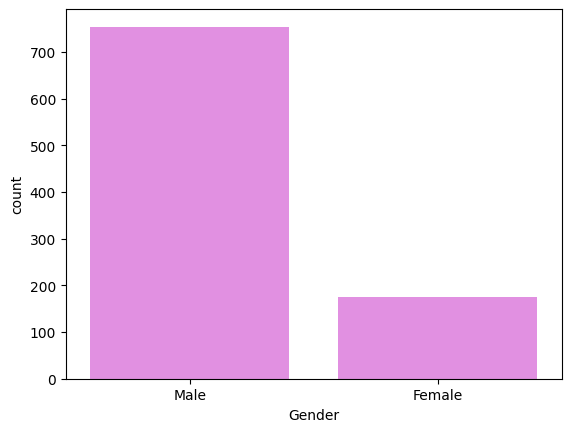

In [ ]:
sns.countplot(x="Gender",data=df,color="Violet")
plt.show()

In [ ]:
df['Married'].value_counts(dropna=False)

Yes    622
No     327
NaN      4
Name: Married, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

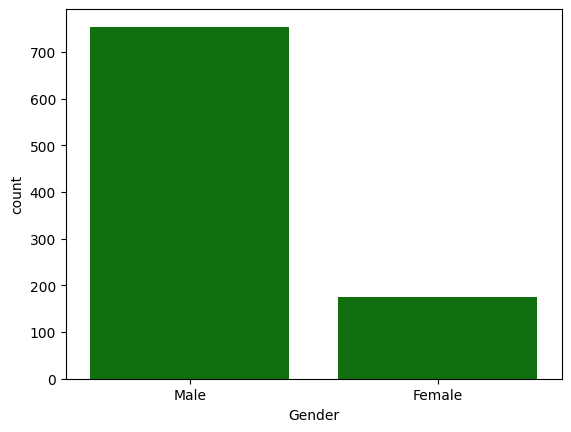

In [ ]:

sns.countplot(x="Gender",data=df,color="green")

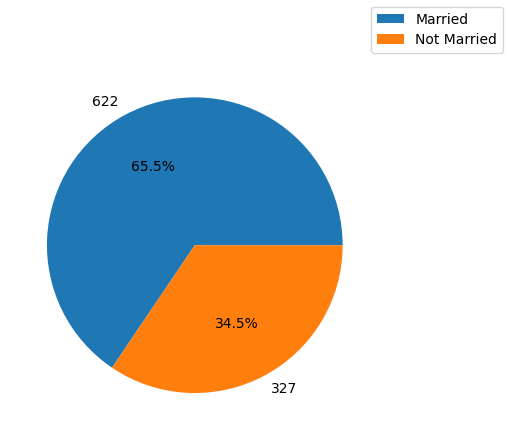

In [ ]:
count_value= df['Married'].value_counts()
plt.pie(count_value,labels=count_value,autopct='%1.1f%%')
plt.figlegend(['Married','Not Married'])
plt.show()

In [ ]:
df['Dependents'].value_counts(dropna=False)

0      524
2      167
1      159
3+      80
NaN     23
Name: Dependents, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

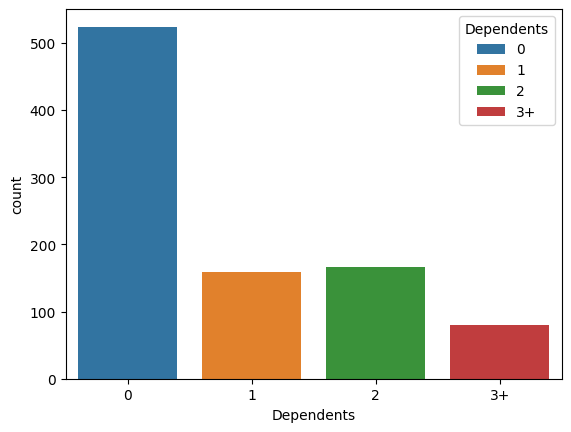

In [ ]:
sns.countplot(x="Dependents",data=df,hue='Dependents')

In [ ]:
df['Education'].value_counts(dropna=False)

Graduate        735
Not Graduate    218
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

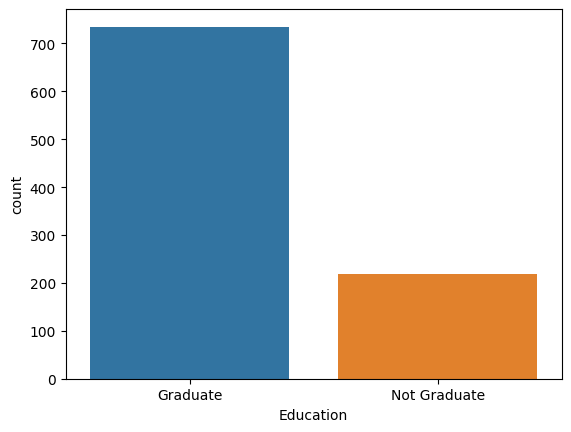

In [ ]:
sns.countplot(x="Education",data=df,hue='Education')

In [ ]:
df['Self_Employed'].value_counts(dropna=False)

No     769
Yes    134
NaN     50
Name: Self_Employed, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

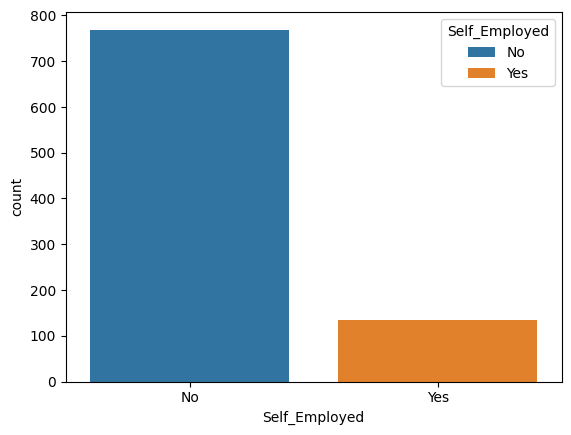

In [ ]:
sns.countplot(x="Self_Employed",data=df,hue='Self_Employed')

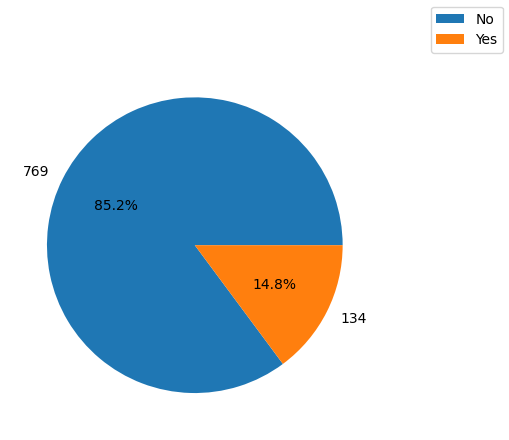

In [ ]:
count_value= df['Self_Employed'].value_counts()
plt.pie(count_value,labels=count_value,autopct='%1.1f%%')
plt.figlegend(['No','Yes'])
plt.show()

In [ ]:
df['ApplicantIncome'].value_counts(dropna=False)

2500     16
2600      9
6000      9
4583      8
3333      8
         ..
3244      1
4408      1
3917      1
3992      1
81002     1
Name: ApplicantIncome, Length: 508, dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

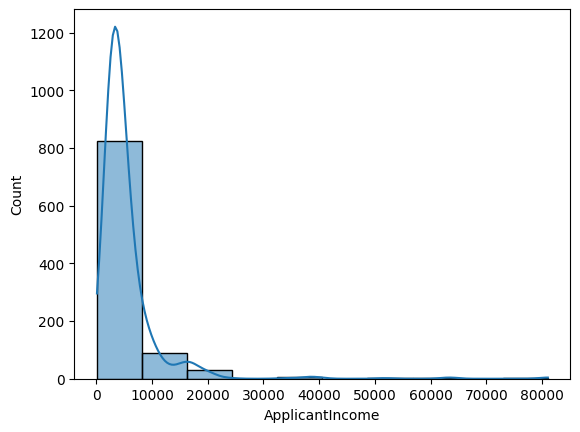

In [ ]:
sns.histplot(df['ApplicantIncome'],bins=10,kde=True)

In [ ]:
df['LoanAmount'].value_counts(dropna=False)

110.0    33
NaN      32
100.0    25
120.0    23
160.0    20
         ..
48.0      1
58.0      1
495.0     1
101.0     1
73.0      1
Name: LoanAmount, Length: 204, dtype: int64

(array([113., 475., 228.,  53.,  21.,  11.,   8.,   5.,   5.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

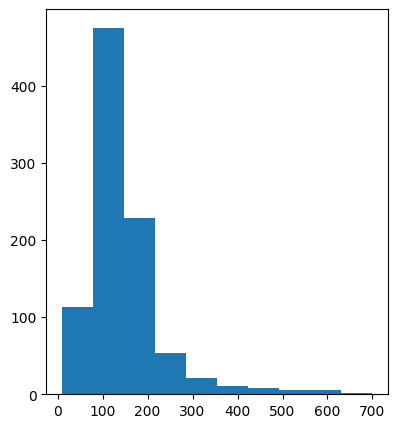

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.hist(df['LoanAmount'])


In [ ]:
df['Loan_Amount_Term'].value_counts(dropna=False)

360.0    792
180.0     70
300.0     26
480.0     22
NaN       18
84.0       8
240.0      6
120.0      3
36.0       3
12.0       3
60.0       2
Name: Loan_Amount_Term, dtype: int64

(array([  6.,  10.,   3.,  70.,   6.,   0.,  26., 792.,   0.,  22.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

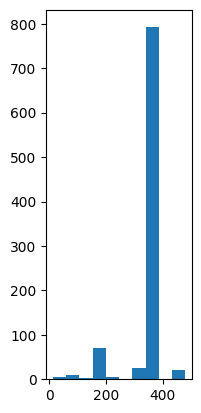

In [ ]:
plt.subplot(1, 3, 2)
plt.hist(df['Loan_Amount_Term'])


In [ ]:
df['Credit_History'].value_counts(dropna=False)

1.0    723
0.0    149
NaN     81
Name: Credit_History, dtype: int64

NameError: name 'df' is not defined

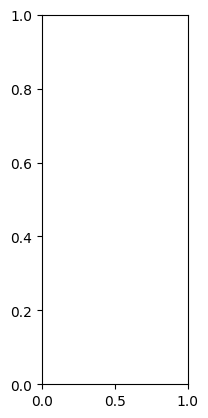

In [ ]:
plt.subplot(1, 3, 3)
plt.bar(range(2),[367-29-df['Credit_History'].sum(),df['Credit_History'].sum()])

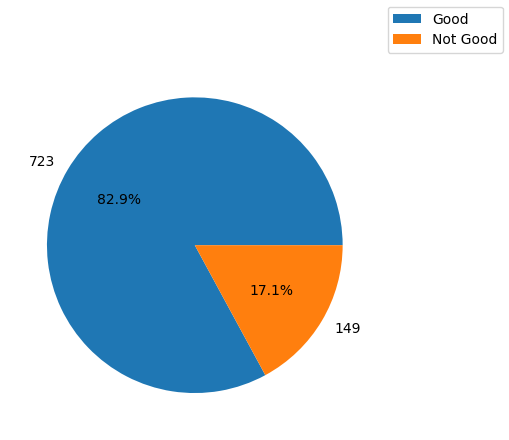

In [ ]:
count_value= df['Credit_History'].value_counts()
plt.pie(count_value,labels=count_value,autopct='%1.1f%%')
plt.figlegend(['Good','Not Good'])
plt.show()

In [ ]:
df['Property_Area'].value_counts(dropna=False)

Semiurban    360
Rural        300
Urban        293
Name: Property_Area, dtype: int64

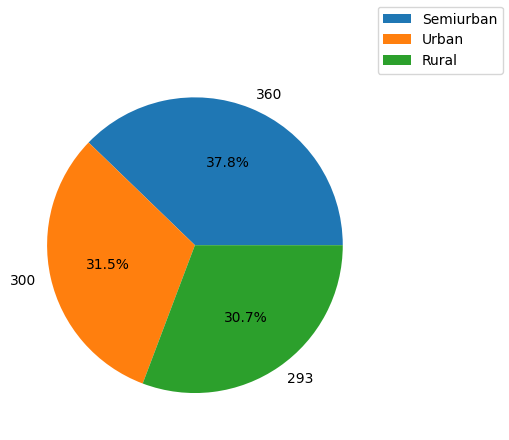

In [ ]:
count_value= df['Property_Area'].value_counts()
plt.pie(count_value,labels=count_value,autopct='%1.1f%%')
plt.figlegend(['Semiurban','Urban','Rural'])
plt.show()

In [ ]:
df['Loan_Status'].value_counts(dropna=False)

Y    644
N    309
Name: Loan_Status, dtype: int64

In [ ]:
count_value= df['Loan_Status'].value_counts()
plt.pie(count_value,labels=count_value,autopct='%1.1f%%')
plt.figlegend(['Loan Approved','Loan Not Approved'])
plt.show()

NameError: name 'df' is not defined

In [ ]:
# @title Cheching NULL values
df.isnull().sum()

Loan_ID               0
Gender               24
Married               4
Dependents           23
Education             0
Self_Employed        50
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           32
Loan_Amount_Term     18
Credit_History       81
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# @title Removing Loan id column
df=df.drop(['Loan_ID'],axis=1)

In [ ]:
# @title Filling NA values with mean,mode techniques
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.163952,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
# @title Create dummies for each attribute in data(for each parameter in column),finally remove the unwanted parameter column
df = pd.get_dummies(df)
df = df.drop(['Gender_Female','Married_No','Education_Not Graduate','Self_Employed_No','Loan_Status_N'],axis = 1)
new = {'Gender_Male':'Gender', 'Married_Yes':'Married','Education_Graduate':'Education', 'Self_Employed_Yes':'Self_Employed','Loan_Status_Y':'Loan_Status'}
df.rename(columns=new,inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.163952,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


In [ ]:
# @title Quantailing for the best range
X1=df.quantile(0.25)
X3=df.quantile(0.75)
XYZ=X3- X1
df=df[~((df<(X1-1.5*XYZ))|(df>(X3+1.5*XYZ))).any(axis=1)]
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.163952,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
13,1853,2840.0,114.000000,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0
15,4950,0.0,125.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
19,2600,3500.0,115.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,3708,2569.0,173.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,0
918,8334,0.0,160.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,1,0,0
921,3015,2188.0,153.000000,360.0,1.0,1,1,1,0,0,0,1,0,1,0,0,1
924,6000,0.0,140.000000,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,1


In [ ]:
X=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=["Gender","Married","Education","Self_Employed","Loan_Status"]
for col in cols:
  df[col]=le.fit_transform(df[col])


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Accuracy for RandomForestClassifier  :  0.9583333333333334
Precision    : 0.9714285714285714
Recall       : 0.9444444444444444
f1 score     : 0.9577464788732395 /n
Classification report for RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.97      0.94      0.96        36

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72

Confusion Matrix  : 
 [[35  1]
 [ 2 34]]


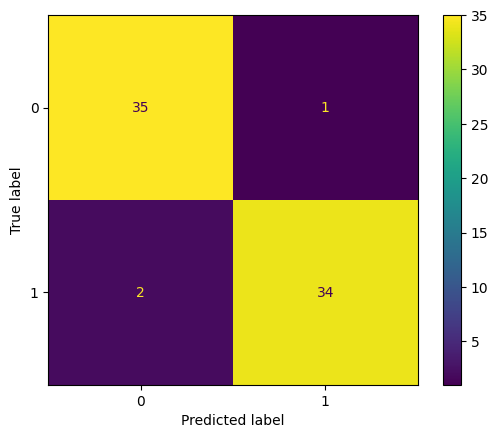

In [ ]:
# @title Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rF=RandomForestClassifier(n_estimators=500,random_state=4)
rF.fit(X_train,y_train)
y_pred=rF.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for RandomForestClassifier  : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'/n')
print("Classification report for RandomForestClassifier : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
# @title Using K-Fold and Cross validation technique for random forest
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print('-----------  At K=3 -----------')
clf=rF
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.86458333 0.75789474 0.75789474]
Number of CV Scores used in Average: 3
Average Accuracy:  0.7937062937062938
Precision: 0.7938356164383563
F1 Score: 0.7936835927470136
Recall: 0.7937062937062938

 -----------  At K=5 ---------
Cross Validation Scores:  [0.9137931  0.98245614 0.89473684 0.96491228 0.94736842]
Number of CV Scores used in Average: 5
Average Accuracy:  0.9405594405594405
Precision: 0.9410987074030552
F1 Score: 0.9405412676865881
Recall: 0.9405594405594405

 -----------  At K=7 ---------
Cross Validation Scores:  [0.90243902 0.80487805 1.         1.         0.95121951 0.97560976
 0.975     ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.9440559440559441
Precision: 0.9444036607448735
F1 Score: 0.9440449987772073
Recall: 0.9440559440559441

 -----------  At K=10 ---------
Cross Validation Scores:  [0.93103448 0.86206897 0.93103448 1.         1.         1.
 0.92857143 1.         0.92857143 1.        ]
N

In [ ]:
print(" using Cross validation technique")
classifier=rF
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k==10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy  at k=3 :  96.52046783625732
Accuracy at k=5 :  96.17059891107077
Accuracy at k=7 :  96.16724738675958
Accuracy at k==10 :  95.49261083743843
Accuracy at k=12 :  95.83333333333334
Accuracy at k=15 :  95.50877192982455


Accuracy for  LogisticRegression :  0.5972222222222222
Precision    : 0.5853658536585366
Recall       : 0.6666666666666666
f1 score     : 0.6233766233766234 /n
Classification report for  LogisticRegression : 
               precision    recall  f1-score   support

           0       0.61      0.53      0.57        36
           1       0.59      0.67      0.62        36

    accuracy                           0.60        72
   macro avg       0.60      0.60      0.60        72
weighted avg       0.60      0.60      0.60        72

Confusion Matrix  : 
 [[19 17]
 [12 24]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


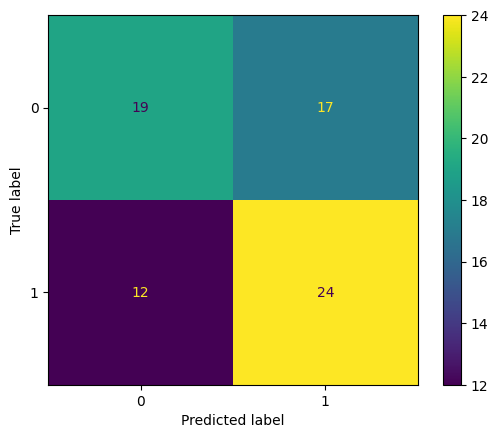

In [ ]:
# @title LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for  LogisticRegression : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'/n')
print("Classification report for  LogisticRegression : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print('-----------  At K=3 -----------')
clf=lr
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.41666667 0.51578947 0.15789474]
Number of CV Scores used in Average: 3
Average Accuracy:  0.36363636363636365
Precision: 0.3581998474446987
F1 Score: 0.35747790450797406
Recall: 0.36363636363636365

 -----------  At K=5 ---------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores:  [0.60344828 0.57894737 0.56140351 0.47368421 0.50877193]
Number of CV Scores used in Average: 5
Average Accuracy:  0.5454545454545454
Precision: 0.5457769022408273
F1 Score: 0.5446529172586096
Recall: 0.5454545454545454

 -----------  At K=7 ---------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores:  [0.63414634 0.48780488 0.58536585 0.58536585 0.58536585 0.41463415
 0.55      ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.548951048951049
Precision: 0.550760649087221
F1 Score: 0.544894963425315
Recall: 0.548951048951049

 -----------  At K=10 ---------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores:  [0.65517241 0.44827586 0.68965517 0.55172414 0.5862069  0.55172414
 0.53571429 0.42857143 0.46428571 0.53571429]
Number of CV Scores used in Average: 10
Average Accuracy:  0.5454545454545454
Precision: 0.5472667175184337
F1 Score: 0.5410556460771243
Recall: 0.5454545454545454

 -----------  At CV=12---------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores:  [0.66666667 0.625      0.58333333 0.79166667 0.45833333 0.58333333
 0.625      0.5        0.5        0.45833333 0.47826087 0.60869565]
Number of CV Scores used in Average: 12


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Average Accuracy:  0.5734265734265734
Precision: 0.5790055248618784
F1 Score: 0.5657606531262446
Recall: 0.5734265734265734

 -----------  At CV=15---------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores:  [0.7        0.57894737 0.63157895 0.63157895 0.78947368 0.47368421
 0.63157895 0.47368421 0.57894737 0.42105263 0.68421053 0.42105263
 0.47368421 0.57894737 0.57894737]
Number of CV Scores used in Average: 15


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Average Accuracy:  0.5769230769230769
Precision: 0.58125
F1 Score: 0.5712143928035982
Recall: 0.5769230769230769

 ------------------------------


In [ ]:
print(" using Cross validation technique")
classifier=lr
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  59.115497076023395
Accuracy at k=5 :  64.37991530550514


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy at k=7 :  61.55052264808363
Accuracy at k=10 :  62.684729064039416


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy at k=12 :  61.18659420289855
Accuracy at k=15 :  60.192982456140356


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for   DecisionTree Classifier :  0.9166666666666666
Precision    : 0.9166666666666666
Recall       : 0.9166666666666666
f1 score     : 0.9166666666666666 

Classification report for   DecisionTree Classifier : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.92      0.92      0.92        36

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72

Confusion Matrix  : 
 [[33  3]
 [ 3 33]]


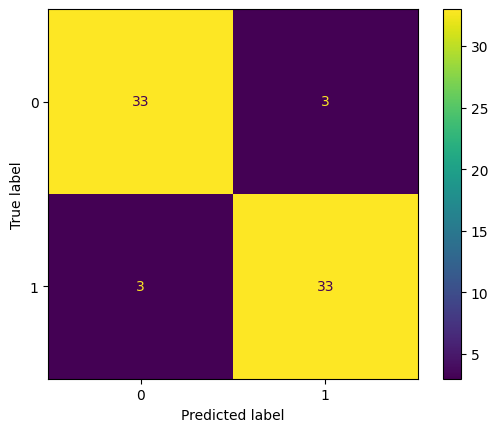

In [ ]:
# @title DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
D_tree=DecisionTreeClassifier()
D_tree.fit(X_train,y_train)
y_pred=D_tree.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for   DecisionTree Classifier : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for   DecisionTree Classifier : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print('-----------  At K=3 -----------')
clf=D_tree
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.80208333 0.77894737 0.74736842]
Number of CV Scores used in Average: 3
Average Accuracy:  0.7552447552447552
Precision: 0.7552946930789924
F1 Score: 0.755232785602504
Recall: 0.7552447552447552

 -----------  At K=5 ---------
Cross Validation Scores:  [0.82758621 0.94736842 0.8245614  0.92982456 0.85964912]
Number of CV Scores used in Average: 5
Average Accuracy:  0.8916083916083916
Precision: 0.892549019607843
F1 Score: 0.8915434205536594
Recall: 0.8916083916083916

 -----------  At K=7 ---------
Cross Validation Scores:  [0.7804878  0.80487805 1.         1.         0.97560976 0.87804878
 0.925     ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.916083916083916
Precision: 0.9164097293593695
F1 Score: 0.9160674981658109
Recall: 0.916083916083916

 -----------  At K=10 ---------
Cross Validation Scores:  [0.75862069 0.72413793 0.82758621 1.         1.         1.
 0.89285714 0.92857143 0.85714286 0.82142857]
Numbe

In [ ]:
print(" using Cross validation technique")
classifier=D_tree
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  89.87938596491229
Accuracy at k=5 :  90.22988505747126
Accuracy at k=7 :  90.58362369337978
Accuracy at k=10 :  89.56896551724137
Accuracy at k=12 :  90.57971014492753
Accuracy at k=15 :  90.98245614035088


Accuracy for SVC Classifier :  0.6666666666666666
Precision    : 0.875
Recall       : 0.3888888888888889
f1 score     : 0.5384615384615385 

Classification report for  for SVC Classifier : 
               precision    recall  f1-score   support

           0       0.61      0.94      0.74        36
           1       0.88      0.39      0.54        36

    accuracy                           0.67        72
   macro avg       0.74      0.67      0.64        72
weighted avg       0.74      0.67      0.64        72

Confusion Matrix  : 
 [[34  2]
 [22 14]]


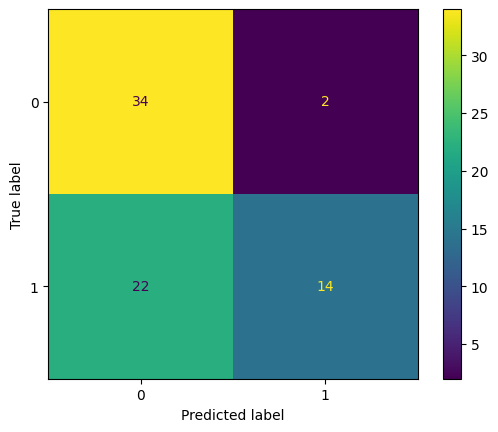

In [ ]:
# @title SVC
from sklearn.svm import SVC
svc_clf=SVC()
svc_clf.fit(X_train,y_train)
y_pred=svc_clf.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for SVC Classifier : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for  for SVC Classifier : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print('-----------  At K=3 -----------')
clf=svc_clf
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.1875     0.52631579 0.        ]
Number of CV Scores used in Average: 3
Average Accuracy:  0.23776223776223776
Precision: 0.22730739893211288
F1 Score: 0.23038562188317785
Recall: 0.23776223776223776

 -----------  At K=5 ---------
Cross Validation Scores:  [0.44827586 0.36842105 0.38596491 0.03508772 0.        ]
Number of CV Scores used in Average: 5
Average Accuracy:  0.24825174825174826
Precision: 0.24545094936708864
F1 Score: 0.24617817606747494
Recall: 0.24825174825174826

 -----------  At K=7 ---------
Cross Validation Scores:  [0.53658537 0.29268293 0.46341463 0.46341463 0.36585366 0.
 0.2       ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.3321678321678322
Precision: 0.3311688311688312
F1 Score: 0.3311784511784512
Recall: 0.3321678321678322

 -----------  At K=10 ---------
Cross Validation Scores:  [0.62068966 0.37931034 0.37931034 0.62068966 0.65517241 0.4137931
 0.32142857 0.46428571 0.35714286 0.5   

In [ ]:
print(" using Cross validation technique")
classifier=svc_clf
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  66.08187134502924
Accuracy at k=5 :  66.44283121597097
Accuracy at k=7 :  64.33797909407666
Accuracy at k=10 :  64.70443349753695
Accuracy at k=12 :  65.05132850241546
Accuracy at k=15 :  67.17543859649123


Accuracy for  KNeighborsClassifier :  0.8333333333333334
Precision    : 0.875
Recall       : 0.7777777777777778
f1 score     : 0.823529411764706 

Classification report for  KNeighborsClassifier : 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        36
           1       0.88      0.78      0.82        36

    accuracy                           0.83        72
   macro avg       0.84      0.83      0.83        72
weighted avg       0.84      0.83      0.83        72

Confusion Matrix  : 
 [[32  4]
 [ 8 28]]


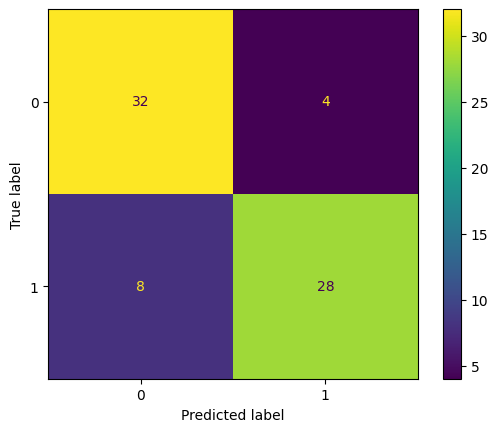

In [ ]:
# @title KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for  KNeighborsClassifier : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for  KNeighborsClassifier : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print('-----------  At K=3 -----------')
clf=knn_clf
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.63541667 0.70526316 0.61052632]
Number of CV Scores used in Average: 3
Average Accuracy:  0.6503496503496503
Precision: 0.6514159074119674
F1 Score: 0.6497330132758536
Recall: 0.6503496503496503

 -----------  At K=5 ---------
Cross Validation Scores:  [0.70689655 0.68421053 0.66666667 0.84210526 0.63157895]
Number of CV Scores used in Average: 5
Average Accuracy:  0.7062937062937062
Precision: 0.7073074843972676
F1 Score: 0.70593419506463
Recall: 0.7062937062937062

 -----------  At K=7 ---------
Cross Validation Scores:  [0.68292683 0.68292683 0.80487805 0.73170732 0.80487805 0.82926829
 0.675     ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.7447552447552448
Precision: 0.7457285938727415
F1 Score: 0.744502233372086
Recall: 0.7447552447552448

 -----------  At K=10 ---------
Cross Validation Scores:  [0.68965517 0.72413793 0.5862069  0.86206897 0.79310345 0.75862069
 0.85714286 0.89285714 0.75       0.714285

In [ ]:
print(" using Cross validation technique")
classifier=knn_clf
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  79.3640350877193
Accuracy at k=5 :  78.68723532970357
Accuracy at k=7 :  78.31010452961672
Accuracy at k=10 :  80.02463054187191
Accuracy at k=12 :  79.67995169082124
Accuracy at k=15 :  79.40350877192982


Accuracy for  XGBClassifier :  0.9166666666666666
Precision    : 0.9411764705882353
Recall       : 0.8888888888888888
f1 score     : 0.9142857142857143 

Classification report for  XGBClassifier : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.94      0.89      0.91        36

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72

Confusion Matrix  : 
 [[34  2]
 [ 4 32]]


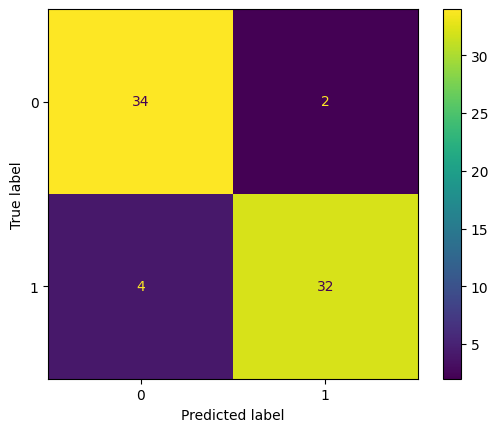

In [ ]:
# @title XGBClassifier
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
xg_classifier.fit(X_train,y_train)
y_pred=xg_classifier.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for  XGBClassifier : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for  XGBClassifier : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()


In [ ]:
print('-----------  At K=3 -----------')
clf=xg_classifier
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.79166667 0.73684211 0.69473684]
Number of CV Scores used in Average: 3
Average Accuracy:  0.7412587412587412
Precision: 0.741684220839661
F1 Score: 0.7411448140900196
Recall: 0.7412587412587412

 -----------  At K=5 ---------
Cross Validation Scores:  [0.82758621 0.92982456 0.89473684 0.94736842 0.94736842]
Number of CV Scores used in Average: 5
Average Accuracy:  0.9090909090909091
Precision: 0.9098123744672513
F1 Score: 0.9090508806262231
Recall: 0.9090909090909091

 -----------  At K=7 ---------
Cross Validation Scores:  [0.7804878  0.7804878  1.         1.         0.95121951 0.97560976
 0.925     ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.916083916083916
Precision: 0.9164097293593695
F1 Score: 0.9160674981658109
Recall: 0.916083916083916

 -----------  At K=10 ---------
Cross Validation Scores:  [0.86206897 0.89655172 0.86206897 1.         1.         1.
 0.92857143 1.         0.92857143 1.        ]
Numb

In [ ]:
print(" using Cross validation technique")
classifier=xg_classifier
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  93.38084795321637
Accuracy at k=5 :  93.7265577737447
Accuracy at k=7 :  95.1219512195122
Accuracy at k=10 :  94.45812807881772
Accuracy at k=12 :  94.79166666666669
Accuracy at k=15 :  93.43859649122807


[LightGBM] [Info] Number of positive: 107, number of negative: 107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 214, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

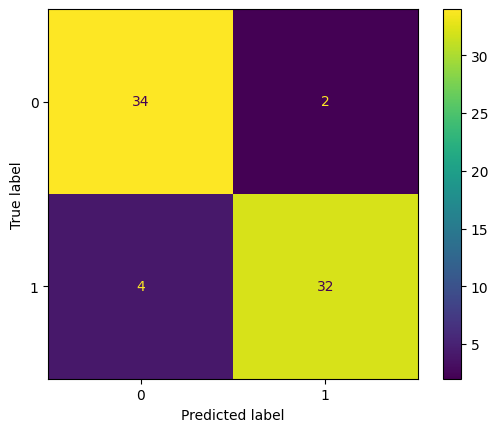

In [ ]:
# @title LGBMClassifier
from lightgbm import LGBMClassifier
LGBM_CLF= LGBMClassifier()
LGBM_CLF.fit(X_train, y_train)
y_pred=xg_classifier.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for  LGBMClassifier : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for  LGBMClassifier : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print('-----------  At K=3 -----------')
clf=LGBM_CLF
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
print(" using Cross validation technique")
classifier=LGBM_CLF
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Accuracy for  GradientBoosting Classifier :  0.9583333333333334
Precision    : 0.9714285714285714
Recall       : 0.9444444444444444
f1 score     : 0.9577464788732395 

Classification report for  GradientBoosting Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.97      0.94      0.96        36

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72

Confusion Matrix  : 
 [[35  1]
 [ 2 34]]


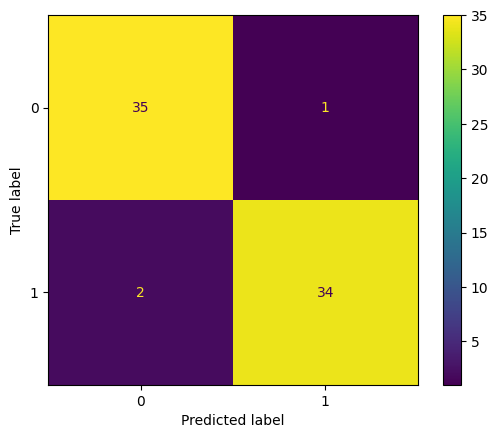

In [ ]:
# @title GradientBoostingClassifier
from numpy.lib.function_base import gradient
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for  GradientBoosting Classifier : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for  GradientBoosting Classifier : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print('-----------  At K=3 -----------')
clf=gb_clf
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.78125    0.81052632 0.70526316]
Number of CV Scores used in Average: 3
Average Accuracy:  0.7657342657342657
Precision: 0.7660595377986683
F1 Score: 0.7656626432353768
Recall: 0.7657342657342657

 -----------  At K=5 ---------
Cross Validation Scores:  [0.77586207 0.9122807  0.89473684 0.92982456 0.9122807 ]
Number of CV Scores used in Average: 5
Average Accuracy:  0.8846153846153846
Precision: 0.8850861731296514
F1 Score: 0.8845801078622005
Recall: 0.8846153846153846

 -----------  At K=7 ---------
Cross Validation Scores:  [0.75609756 0.7804878  1.         1.         0.97560976 0.92682927
 0.95      ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.9125874125874126
Precision: 0.9130924402663533
F1 Score: 0.9125606877743946
Recall: 0.9125874125874126

 -----------  At K=10 ---------
Cross Validation Scores:  [0.82758621 0.79310345 0.86206897 1.         1.         1.
 0.96428571 0.92857143 0.89285714 0.96428571]
N

In [ ]:
print(" using Cross validation technique")
classifier=gb_clf
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  89.90497076023391
Accuracy at k=5 :  91.65154264972777
Accuracy at k=7 :  93.03135888501741
Accuracy at k=10 :  91.33004926108373
Accuracy at k=12 :  91.65157004830918
Accuracy at k=15 :  92.01754385964914


Accuracy for AdaBoostClassifier :  0.8611111111111112
Precision    : 0.8823529411764706
Recall       : 0.8333333333333334
f1 score     : 0.8571428571428571 

Classification report for  AdaBoostClassifier : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.88      0.83      0.86        36

    accuracy                           0.86        72
   macro avg       0.86      0.86      0.86        72
weighted avg       0.86      0.86      0.86        72

Confusion Matrix  : 
 [[32  4]
 [ 6 30]]


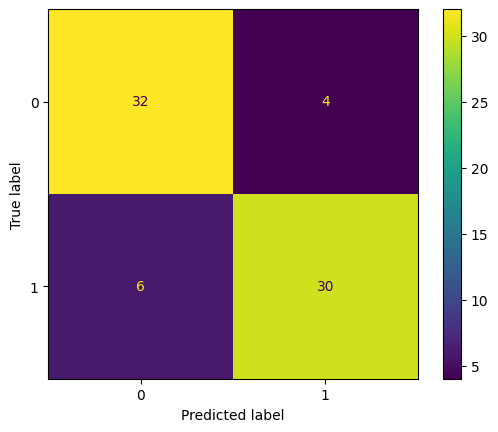

In [ ]:
# @title AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad_clf=AdaBoostClassifier()
ad_clf.fit(X_train,y_train)
y_pred=ad_clf.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for AdaBoostClassifier : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for  AdaBoostClassifier : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print('-----------  At K=3 -----------')
clf=ad_clf
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.71875    0.73684211 0.72631579]
Number of CV Scores used in Average: 3
Average Accuracy:  0.7272727272727273
Precision: 0.7273171924675961
F1 Score: 0.7272593896713616
Recall: 0.7272727272727273

 -----------  At K=5 ---------
Cross Validation Scores:  [0.79310345 0.84210526 0.75438596 0.87719298 0.8245614 ]
Number of CV Scores used in Average: 5
Average Accuracy:  0.8181818181818182
Precision: 0.8181818181818182
F1 Score: 0.8181818181818182
Recall: 0.8181818181818182

 -----------  At K=7 ---------
Cross Validation Scores:  [0.80487805 0.73170732 0.87804878 0.85365854 0.90243902 0.87804878
 0.9       ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.8496503496503497
Precision: 0.8498043052837573
F1 Score: 0.8496338048834168
Recall: 0.8496503496503497

 -----------  At K=10 ---------
Cross Validation Scores:  [0.75862069 0.72413793 0.75862069 0.89655172 0.86206897 0.86206897
 0.89285714 0.89285714 0.89285714 0.928

In [ ]:
print(" using Cross validation technique")
classifier=ad_clf
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  85.32529239766082
Accuracy at k=5 :  84.99092558983665
Accuracy at k=7 :  86.04529616724739
Accuracy at k=10 :  85.38177339901478
Accuracy at k=12 :  83.96739130434784
Accuracy at k=15 :  85.36842105263159


Accuracy for  GaussianNB :  0.6666666666666666
Precision    : 0.6875
Recall       : 0.6111111111111112
f1 score     : 0.6470588235294118 

Classification report for  GaussianNB : 
               precision    recall  f1-score   support

           0       0.65      0.72      0.68        36
           1       0.69      0.61      0.65        36

    accuracy                           0.67        72
   macro avg       0.67      0.67      0.67        72
weighted avg       0.67      0.67      0.67        72

Confusion Matrix  : 
 [[26 10]
 [14 22]]


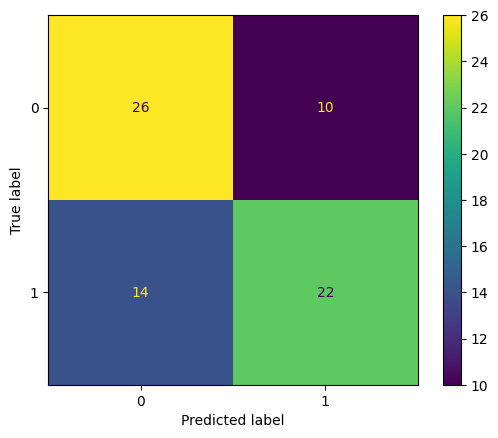

In [ ]:
# @title GaussianNB
from sklearn.naive_bayes import GaussianNB
gaussian_clf= GaussianNB()
gaussian_clf.fit(X_train,y_train)
y_pred=gaussian_clf.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for  GaussianNB : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for  GaussianNB : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print('-----------  At K=3 -----------')
clf=gaussian_clf
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.54166667 0.49473684 0.07368421]
Number of CV Scores used in Average: 3
Average Accuracy:  0.3706293706293706
Precision: 0.3638095238095238
F1 Score: 0.36265042341405435
Recall: 0.3706293706293706

 -----------  At K=5 ---------
Cross Validation Scores:  [0.5862069  0.57894737 0.52631579 0.61403509 0.52631579]
Number of CV Scores used in Average: 5
Average Accuracy:  0.5664335664335665
Precision: 0.5664855870405715
F1 Score: 0.5663487405233553
Recall: 0.5664335664335665

 -----------  At K=7 ---------
Cross Validation Scores:  [0.56097561 0.58536585 0.53658537 0.58536585 0.58536585 0.48780488
 0.55      ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.5559440559440559
Precision: 0.556078431372549
F1 Score: 0.5556778842037018
Recall: 0.5559440559440559

 -----------  At K=10 ---------
Cross Validation Scores:  [0.55172414 0.62068966 0.5862069  0.5862069  0.5862069  0.51724138
 0.64285714 0.64285714 0.64285714 0.714

In [ ]:
print(" using Cross validation technique")
classifier=gaussian_clf
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  64.36038011695906
Accuracy at k=5 :  62.631578947368425
Accuracy at k=7 :  63.25783972125436
Accuracy at k=10 :  64.37192118226601
Accuracy at k=12 :  63.617149758454104
Accuracy at k=15 :  63.01754385964914


Accuracy for  MPL :  0.5972222222222222
Precision    : 0.7333333333333333
Recall       : 0.3055555555555556
f1 score     : 0.43137254901960786 

Classification report for  MPL : 
               precision    recall  f1-score   support

           0       0.56      0.89      0.69        36
           1       0.73      0.31      0.43        36

    accuracy                           0.60        72
   macro avg       0.65      0.60      0.56        72
weighted avg       0.65      0.60      0.56        72

Confusion Matrix  : 
 [[32  4]
 [25 11]]


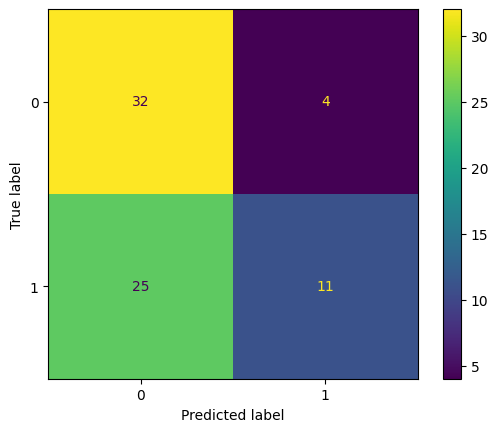

In [ ]:
# @title MLPClassifier
from sklearn.neural_network import MLPClassifier
MLP_clf=MLPClassifier(max_iter=700,random_state=1)
MLP_clf.fit(X_train,y_train)
y_pred=MLP_clf.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for  MPL : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for  MPL : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print('-----------  At K=3 -----------')
clf=MLP_clf
k_folds = KFold(n_splits = 3)
score= cross_val_score(clf, X, y, cv =k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=5 ---------")
k_folds = KFold(n_splits = 5)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=7 ---------")
k_folds = KFold(n_splits = 7)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At K=10 ---------")
k_folds = KFold(n_splits = 10)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=12---------")
k_folds = KFold(n_splits = 12)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n -----------  At CV=15---------")
k_folds = KFold(n_splits = 15)
score= cross_val_score(clf, X, y, cv = k_folds)
print("Cross Validation Scores: ",score)
print("Number of CV Scores used in Average:", len(score))
predicted = cross_val_predict(clf, X,y,cv=k_folds)
print("Average Accuracy: ", accuracy_score(y,predicted))
print("Precision:", precision_score(y,predicted,average='weighted'))
print("F1 Score:",f1_score(y,predicted,average='weighted'))
print("Recall:",recall_score(y,predicted,average='weighted'))
print("\n ------------------------------")


-----------  At K=3 -----------
Cross Validation Scores:  [0.14583333 0.47368421 0.12631579]
Number of CV Scores used in Average: 3
Average Accuracy:  0.24825174825174826
Precision: 0.21476063829787234
F1 Score: 0.22551797972164492
Recall: 0.24825174825174826

 -----------  At K=5 ---------
Cross Validation Scores:  [0.55172414 0.43859649 0.38596491 0.42105263 0.70175439]
Number of CV Scores used in Average: 5
Average Accuracy:  0.5
Precision: 0.5
F1 Score: 0.4948057562843556
Recall: 0.5

 -----------  At K=7 ---------
Cross Validation Scores:  [0.48780488 0.65853659 0.51219512 0.51219512 0.68292683 0.36585366
 0.5       ]
Number of CV Scores used in Average: 7
Average Accuracy:  0.5314685314685315
Precision: 0.531474688187821
F1 Score: 0.5314456181533646
Recall: 0.5314685314685315

 -----------  At K=10 ---------
Cross Validation Scores:  [0.68965517 0.51724138 0.65517241 0.5862069  0.55172414 0.37931034
 0.92857143 0.64285714 0.85714286 0.96428571]
Number of CV Scores used in Average

In [ ]:
print(" using Cross validation technique")
classifier=gaussian_clf
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  61.54605263157894
Accuracy at k=5 :  61.22202056866304
Accuracy at k=7 :  60.13066202090593
Accuracy at k=10 :  60.874384236453196
Accuracy at k=12 :  59.43538647342995
Accuracy at k=15 :  59.85964912280702


In [ ]:
# @title Hyper Parameter Tuning-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500,random_state =4)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy for RandomForest Classifier  : ",accuracy,'\n')
param_dist = {"max_depth":[1,200],"random_state":[4],"criterion": ["gini", "entropy"]}
print('------ AT CV=5------')
rf_cv = GridSearchCV(rfc,param_grid=param_dist,cv=5)
rf_cv.fit(X, y)
print("Tuned RandomForest Classifier Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))
print('------ AT CV=7------')
rf_cv = GridSearchCV(rfc,param_grid=param_dist,cv=7)
rf_cv.fit(X, y)
print("Tuned RandomForest Classifier Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))
print('------ AT CV=10------')
rf_cv = GridSearchCV(rfc,param_grid=param_dist,cv=10)
rf_cv.fit(X, y)
print("Tuned RandomForest Classifier Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))
print('------ AT CV=12------')
rf_cv = GridSearchCV(rfc,param_grid=param_dist,cv=12)
rf_cv.fit(X, y)
print("Tuned RandomForest Classifier Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))
print('------ AT CV=15------')
rf_cv = GridSearchCV(rfc,param_grid=param_dist,cv=15)
rf_cv.fit(X, y)
print("Tuned RandomForest Classifier Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Accuracy for RandomForest Classifier  :  0.9583333333333334 

------ AT CV=5------
Tuned RandomForest Classifier Parameters: {'criterion': 'entropy', 'max_depth': 200, 'random_state': 4}
Best score is 0.9512401693889897
------ AT CV=7------
Tuned RandomForest Classifier Parameters: {'criterion': 'gini', 'max_depth': 200, 'random_state': 4}
Best score is 0.9510452961672474
------ AT CV=10------
Tuned RandomForest Classifier Parameters: {'criterion': 'gini', 'max_depth': 200, 'random_state': 4}
Best score is 0.9477832512315271
------ AT CV=12------
Tuned RandomForest Classifier Parameters: {'criterion': 'gini', 'max_depth': 200, 'random_state': 4}
Best score is 0.9545591787439615
------ AT CV=15------
Tuned RandomForest Classifier Parameters: {'criterion': 'gini', 'max_depth': 200, 'random_state': 4}
Best score is 0.9478947368421053


In [ ]:
# @title Hyper Parameter Tuning RandomizedSearchCV
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [3, None],"max_features": randint(1, 9),"min_samples_leaf": randint(1, 9),"criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(rfc, param_dist, cv=5)
tree_cv.fit(X, y)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}
Best score is 0.947731397459165


Accuracy for  LogisticRegression :  0.9166666666666666
Precision    : 0.9166666666666666
Recall       : 0.9166666666666666
f1 score     : 0.9166666666666666 

Classification report for  LogisticRegression : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.92      0.92      0.92        36

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72

Confusion Matrix  : 
 [[33  3]
 [ 3 33]]


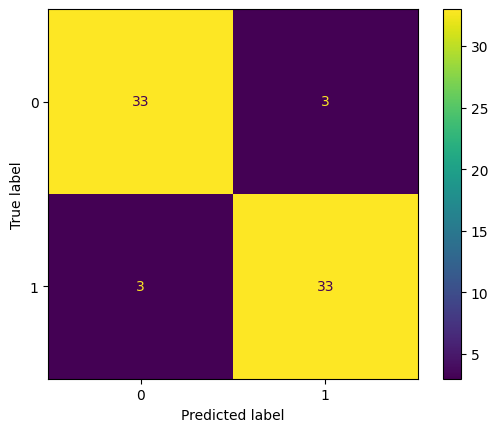

In [ ]:
# @title BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=500,random_state=42)
model = BaggingClassifier(rf_clf)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cn_mtx=confusion_matrix(y_test,y_pred)
print("Accuracy for  LogisticRegression : ",accuracy_score(y_test,y_pred))
print("Precision    :",precision_score(y_test,y_pred))
print("Recall       :",recall_score(y_test,y_pred))
print("f1 score     :",f1_score(y_test,y_pred),'\n')
print("Classification report for  LogisticRegression : \n",classification_report(y_test,y_pred))
print("Confusion Matrix  : \n",cn_mtx)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=cn_mtx)
matrix_display.plot()

In [ ]:
print(" using Cross validation technique")
classifier=model
score=cross_val_score(classifier,X,y,cv=3)
print("Accuracy at k=3 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=5)
print("Accuracy at k=5 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=7)
print("Accuracy at k=7 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=10)
print("Accuracy at k=10 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=12)
print("Accuracy at k=12 : ",np.mean(score)*100)
score=cross_val_score(classifier,X,y,cv=15)
print("Accuracy at k=15 : ",np.mean(score)*100)

 using Cross validation technique
Accuracy at k=3 :  89.89400584795321
Accuracy at k=5 :  91.66364186327888
Accuracy at k=7 :  92.67421602787456
Accuracy at k=10 :  93.05418719211822
Accuracy at k=12 :  91.6364734299517
Accuracy at k=15 :  92.38596491228071


In [ ]:
# @title Comparison Analysis


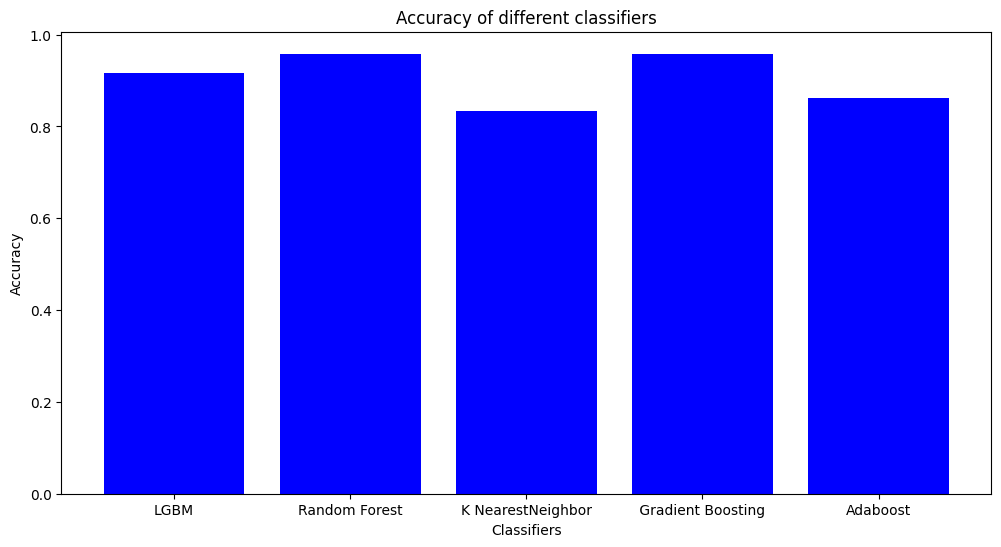

In [ ]:
# @title Accuracy of different classifiers
import numpy as np
import matplotlib.pyplot as plt
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
Accuracies=[0.9166,0.95833,0.8333,0.95833,0.86111]
plt.figure(figsize=(12,6))
plt.bar(clf,Accuracies,color="blue")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy of different classifiers")
plt.show()


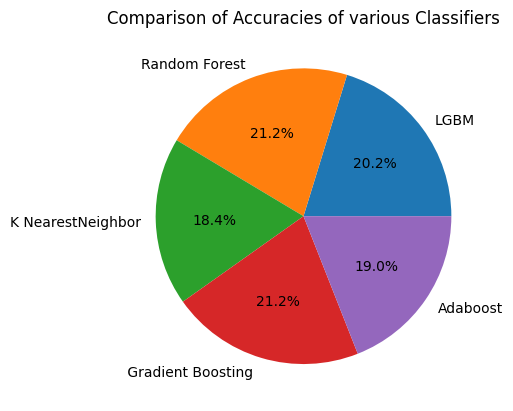

In [ ]:
import matplotlib.pyplot as plt
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
Accuracies=[0.9166,0.95833,0.8333,0.95833,0.86111]
plt.pie(Accuracies,labels=clf,autopct='%1.1f%%')
plt.title('Comparison of Accuracies of various Classifiers')
plt.show()

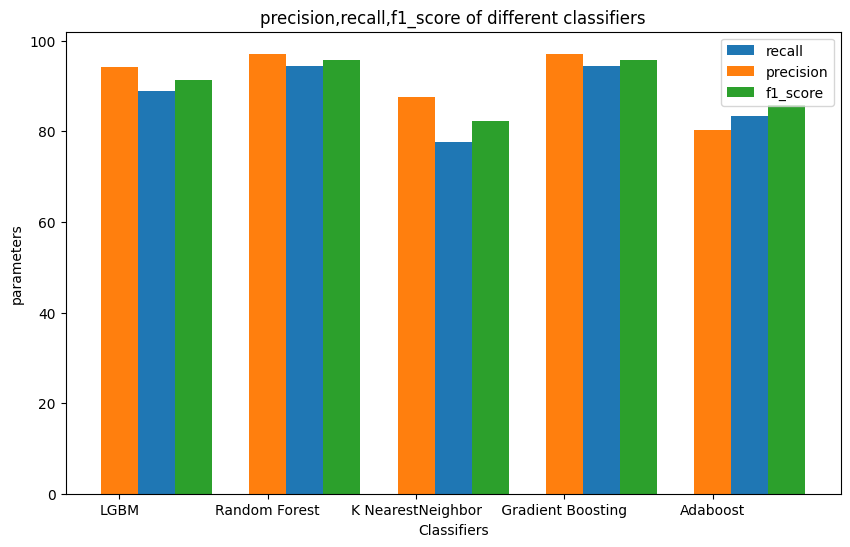

In [ ]:
# @title Precision,Recall,F1_Score of different classifiers
import numpy as np
import matplotlib.pyplot as plt
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
precision=[94.11,97.14,87.5,97.14,80.23]
recall=[88.88,94.44,77.7,94.44,83.33]
f1=[91.42,95.77,82.35,95.77,85.71]
width=0.25
ind=np.arange(len(clf))
plt.figure(figsize=(10,6))
plt.bar(ind+width,recall,width,label="recall")
plt.bar(ind,precision,width,label="precision")
plt.bar(ind+width*2,f1,width,label="f1_score")
plt.title("precision,recall,f1_score of different classifiers")
plt.xlabel("Classifiers")
plt.ylabel("parameters")
plt.xticks(ind,clf)
plt.legend( )
plt.show()

<Figure size 400x400 with 0 Axes>

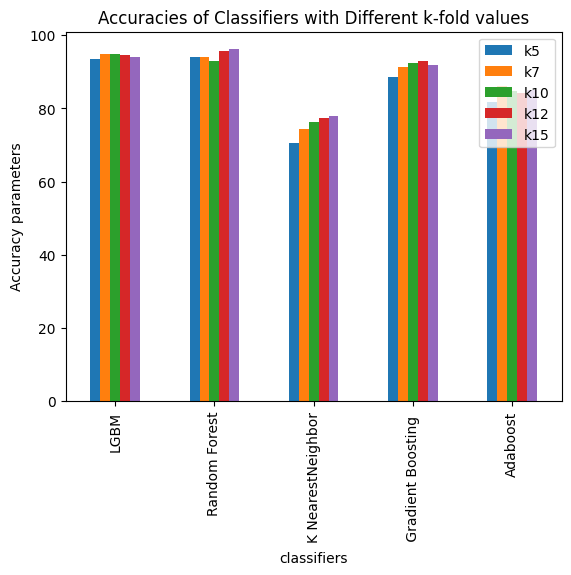

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
data = {'k5':[93.40,94.055,70.62,88.461,81.81],
        'k7':[94.77,94.055,74.47,91.258,86.04],
       'k10':[94.81,92.857,76.22,92.307,84.61],
       'k12':[94.44,95.80,77.27,93.006,84.265],
       'k15':[94.12,96.153,77.97,91.958,84.965]}
df = pd.DataFrame(data,index=clf)
plt.figure(figsize=(4,4))
df.plot.bar(title="Accuracies of Classifiers with Different k-fold values",xlabel="classifiers",ylabel="Accuracy parameters")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
data = {'Precision':[93.40,94.055,70.62,88.461,81.81],
        'Recall':[94.77,94.055,74.47,91.258,86.04],
       'F1-score':[94.81,92.857,76.22,92.307,84.61]}
df = pd.DataFrame(data,index =clf)
plt.figure(figsize=(10,6))
df.plot.bar(title="Precision,Recall and F1-Score at K=5",xlabel="classifiers",ylabel="Accuracy parameters")
plt.show()

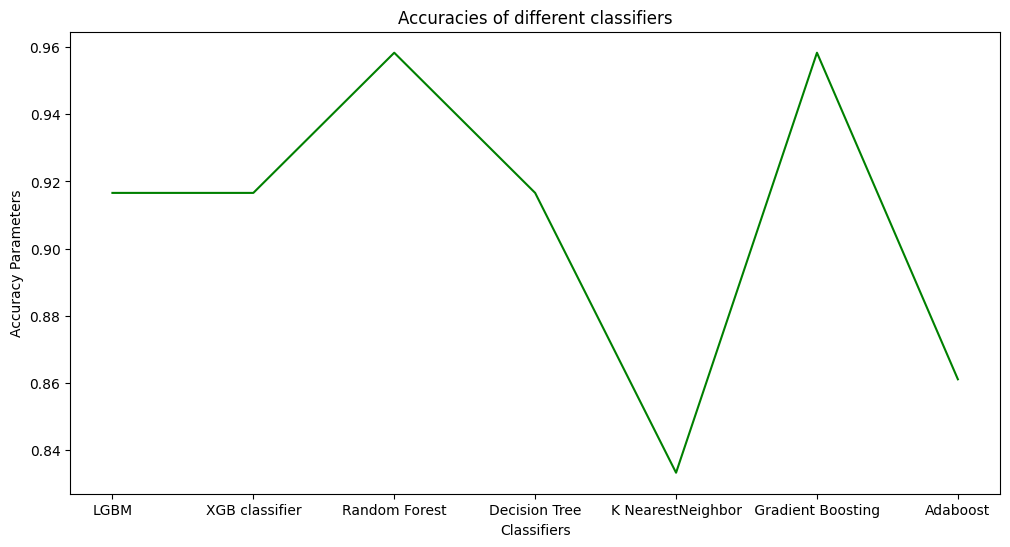

In [ ]:

clf=["LGBM","XGB classifier","Random Forest","Decision Tree","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
Accuracies=[.9166,0.9166,0.95833,0.9166,0.8333,0.95833,0.86111]
plt.figure(figsize=(12,6))
plt.title("Accuracies of different classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Parameters")
plt.plot(clf,Accuracies, color ="green")
plt.show()


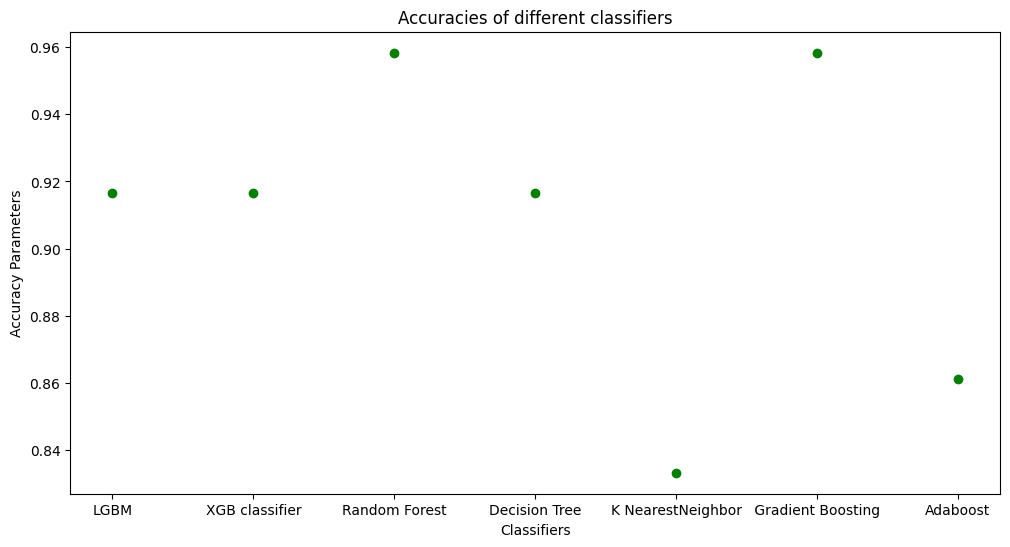

In [ ]:

clf=["LGBM","XGB classifier","Random Forest","Decision Tree","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
Accuracies=[.9166,0.9166,0.95833,0.9166,0.8333,0.95833,0.86111]
plt.figure(figsize=(12,6))
plt.title("Accuracies of different classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Parameters")
plt.scatter(clf,Accuracies, color ="green")
plt.show()


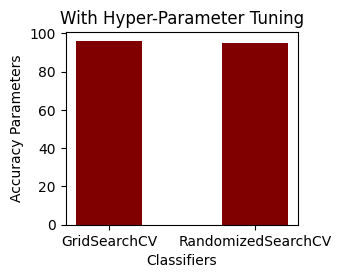

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (3,2.5))
data = {"GridSearchCV":95.83,"RandomizedSearchCV":94.77}
clf=list(data.keys())
accuracies=list(data.values())
plt.bar(clf,accuracies, color ='maroon',width = 0.45)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Parameters")
plt.title("With Hyper-Parameter Tuning")
plt.show()

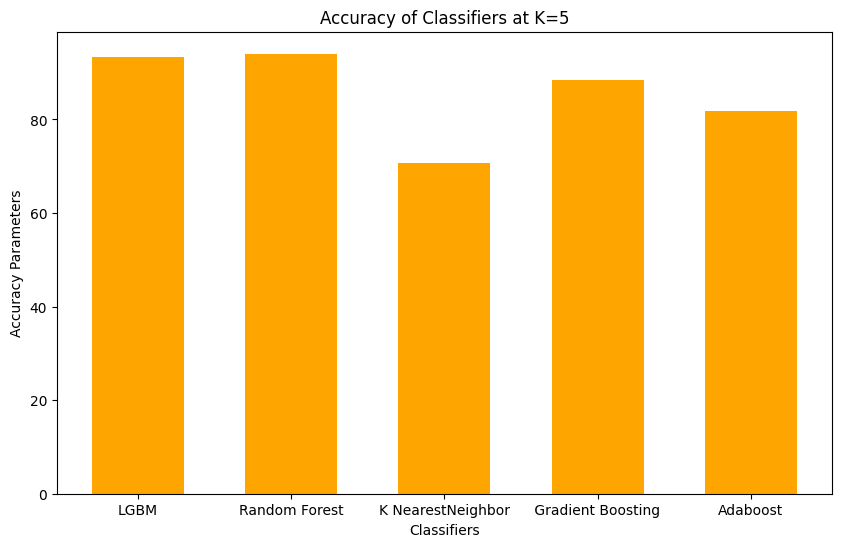

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k5=[93.40,94.055,70.62,88.461,81.81]
plt.figure(figsize = (10,6))
plt.bar(clf,k5, color ='orange',width = 0.6)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Parameters")
plt.title("Accuracy of Classifiers at K=5")
plt.show()

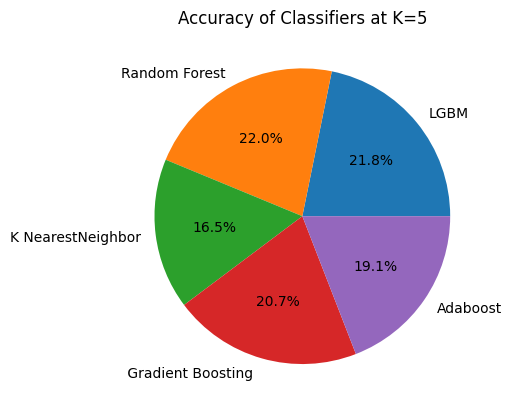

In [ ]:
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k5=[93.40,94.055,70.62,88.461,81.81]
plt.pie(k5,labels=clf,autopct='%1.1f%%')
plt.title('Accuracy of Classifiers at K=5')
plt.show()

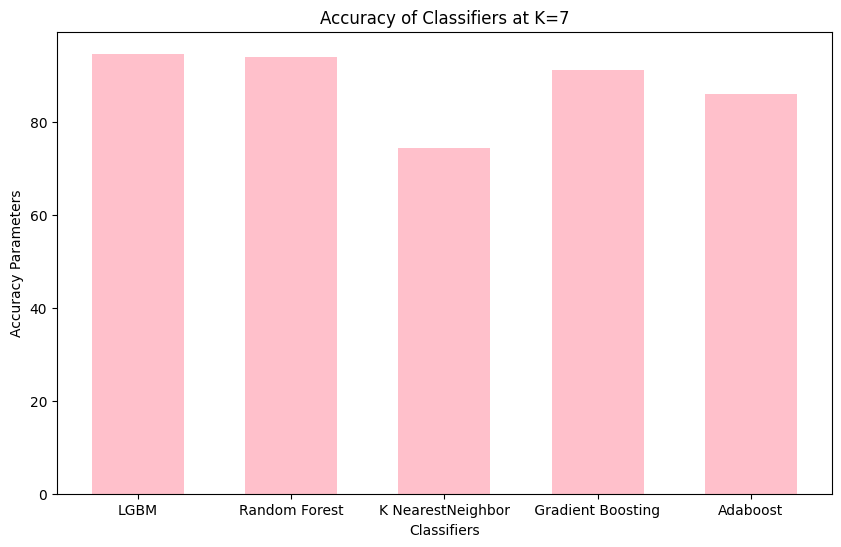

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k7=[94.77,94.055,74.47,91.258,86.04]
plt.figure(figsize = (10,6))
plt.bar(clf,k7, color ='pink',width = 0.6)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Parameters")
plt.title("Accuracy of Classifiers at K=7")
plt.show()

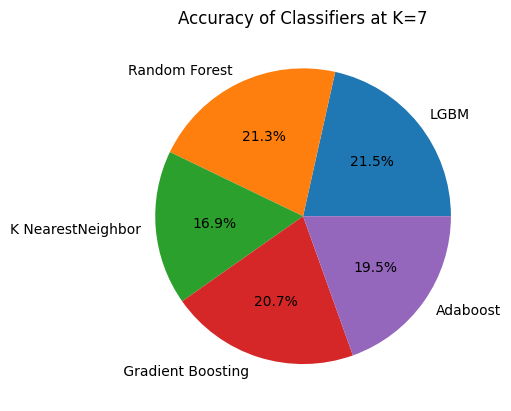

In [ ]:
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k7=[94.77,94.055,74.47,91.258,86.04]
plt.pie(k7,labels=clf,autopct='%1.1f%%')
plt.title('Accuracy of Classifiers at K=7')
plt.show()

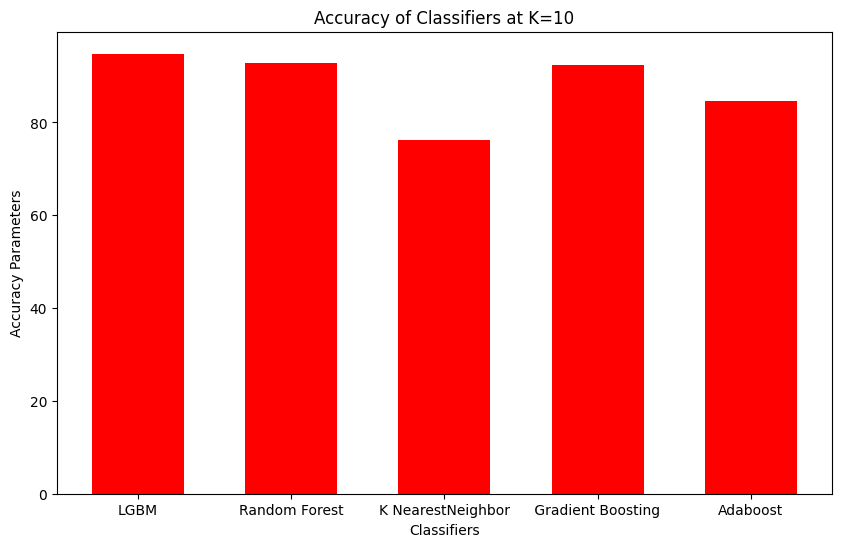

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k10=[94.81,92.857,76.22,92.307,84.61]
plt.figure(figsize = (10,6))
plt.bar(clf,k10, color ='red',width = 0.6)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Parameters")
plt.title("Accuracy of Classifiers at K=10")
plt.show()

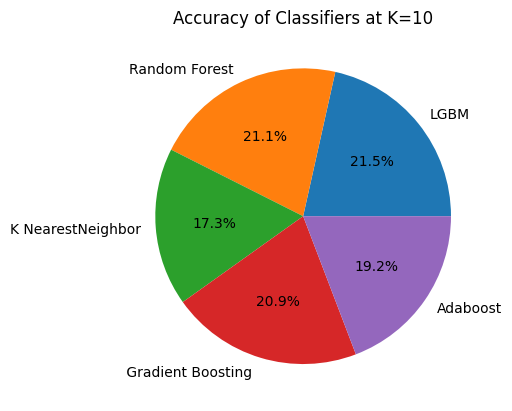

In [ ]:
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k10=[94.81,92.857,76.22,92.307,84.61]
plt.pie(k10,labels=clf,autopct='%1.1f%%')
plt.title('Accuracy of Classifiers at K=10')
plt.show()

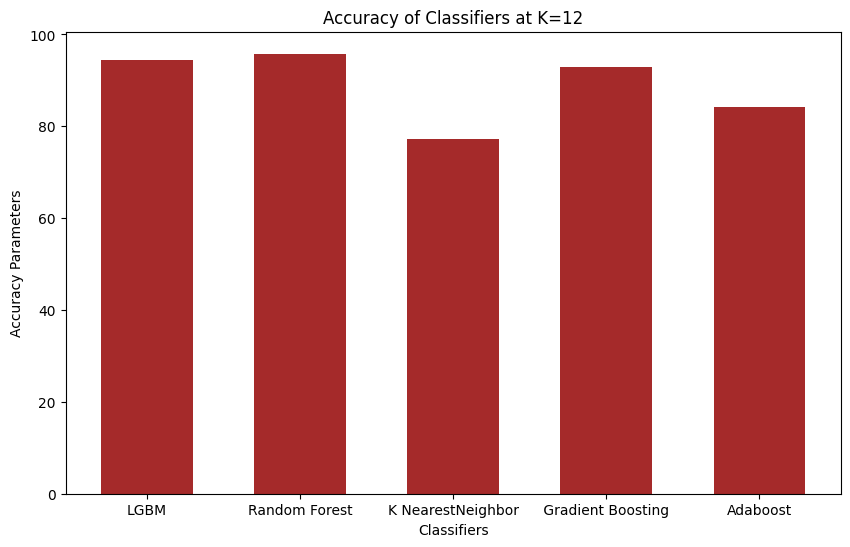

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k12=[94.44,95.80,77.27,93.006,84.265]
plt.figure(figsize = (10,6))
plt.bar(clf,k12, color ='brown',width = 0.6)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Parameters")
plt.title("Accuracy of Classifiers at K=12")
plt.show()

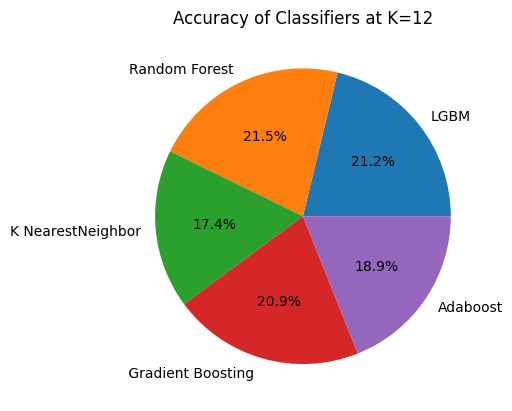

In [ ]:
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k12=[94.44,95.80,77.27,93.006,84.265]
plt.pie(k12,labels=clf,autopct='%1.1f%%')
plt.title('Accuracy of Classifiers at K=12')
plt.show()

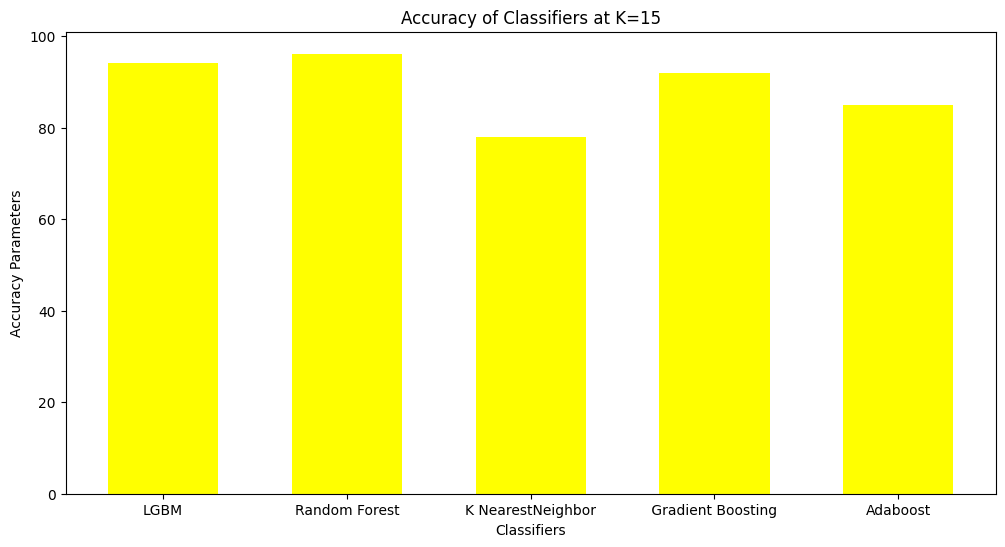

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k15=[94.12,96.153,77.97,91.958,84.965]
plt.figure(figsize = (12,6))
plt.bar(clf,k15,color ='yellow',width = 0.6)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Parameters")
plt.title("Accuracy of Classifiers at K=15")
plt.show()

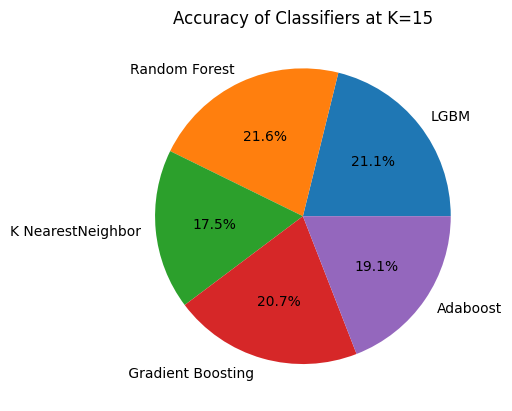

In [ ]:

clf=["LGBM","Random Forest","K NearestNeighbor"," Gradient Boosting ","Adaboost"]
k15=[94.12,96.153,77.97,91.958,84.965]
plt.pie(k15,labels=clf,autopct='%1.1f%%')
plt.title('Accuracy of Classifiers at K=15')
plt.show()

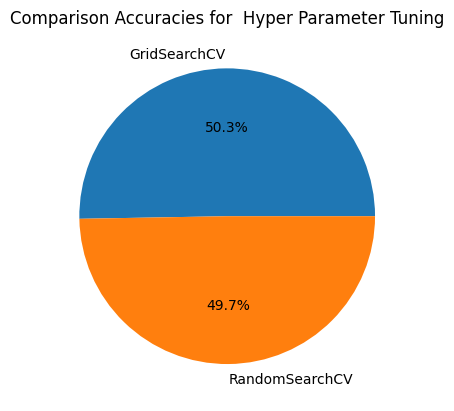

In [ ]:
import matplotlib.pyplot as plt
clf=["GridSearchCV","RandomSearchCV"]
Accuracy=[95.84,94.77]
plt.pie(Accuracy,labels=clf,autopct='%1.1f%%')
plt.title('Comparison Accuracies for  Hyper Parameter Tuning')
plt.show()

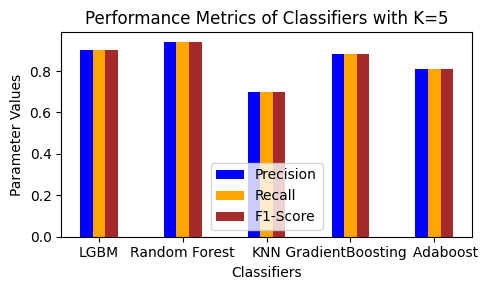

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def draw_side_by_side_bars(categories, param1_data, param2_data, param3_data):
    num_categories = len(categories)
    bar_width = 0.15
    index = np.arange(num_categories)
    colors = ['blue','orange','brown']
    plt.figure(figsize=(5,3))
    plt.bar(index - bar_width, param1_data, bar_width, color=colors[0], label='Precision')
    plt.bar(index, param2_data, bar_width, color=colors[1], label='Recall')
    plt.bar(index + bar_width, param3_data, bar_width, color=colors[2], label='F1-Score')
    plt.xlabel('Classifiers')
    plt.ylabel('Parameter Values')
    plt.title('Performance Metrics of Classifiers with K=5')
    plt.xticks(index, categories)
    plt.legend()
    plt.tight_layout()
    plt.show()
clf=["LGBM","Random Forest","KNN"," GradientBoosting   ","     Adaboost"]
Precision = [0.9,0.94,0.7,0.88,0.81]
Recall = [0.9,0.94,0.7,0.88,0.81]
F1_Score = [0.9,0.94,0.7,0.88,0.81]

draw_side_by_side_bars(clf, Precision, Recall, F1_Score)


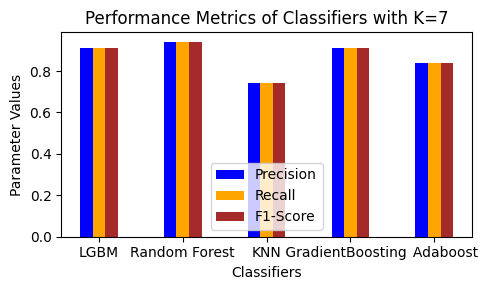

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def draw_side_by_side_bars(categories, param1_data, param2_data, param3_data):
    num_categories = len(categories)
    bar_width = 0.15
    index = np.arange(num_categories)
    colors = ['blue','orange','brown']
    plt.figure(figsize=(5,3))
    plt.bar(index - bar_width, param1_data, bar_width, color=colors[0], label='Precision')
    plt.bar(index, param2_data, bar_width, color=colors[1], label='Recall')
    plt.bar(index + bar_width, param3_data, bar_width, color=colors[2], label='F1-Score')
    plt.xlabel('Classifiers')
    plt.ylabel('Parameter Values')
    plt.title('Performance Metrics of Classifiers with K=7')
    plt.xticks(index, categories)
    plt.legend()
    plt.tight_layout()
    plt.show()
clf=["LGBM","Random Forest","KNN"," GradientBoosting   ","     Adaboost"]
Precision = [0.91,0.94,0.74,0.91,0.84]
Recall = [0.91,0.94,0.74,0.91,0.84]
F1_Score = [0.91,0.94,0.74,0.91,0.84]

draw_side_by_side_bars(clf, Precision, Recall, F1_Score)


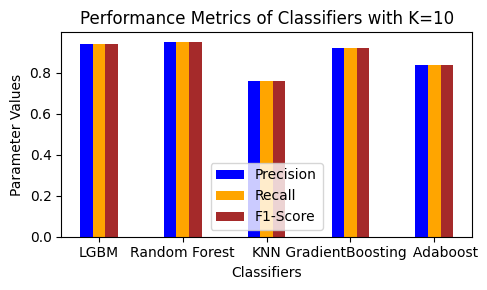

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def draw_side_by_side_bars(categories, param1_data, param2_data, param3_data):
    num_categories = len(categories)
    bar_width = 0.15
    index = np.arange(num_categories)
    colors = ['blue','orange','brown']
    plt.figure(figsize=(5,3))
    plt.bar(index - bar_width, param1_data, bar_width, color=colors[0], label='Precision')
    plt.bar(index, param2_data, bar_width, color=colors[1], label='Recall')
    plt.bar(index + bar_width, param3_data, bar_width, color=colors[2], label='F1-Score')
    plt.xlabel('Classifiers')
    plt.ylabel('Parameter Values')
    plt.title('Performance Metrics of Classifiers with K=10')
    plt.xticks(index, categories)
    plt.legend()
    plt.tight_layout()
    plt.show()
clf=["LGBM","Random Forest","KNN"," GradientBoosting   ","     Adaboost"]
Precision = [0.94,0.95,0.76,0.92,0.84]
Recall = [0.94,0.95,0.76,0.92,0.84]
F1_Score = [0.94,0.95,0.76,0.92,0.84]

draw_side_by_side_bars(clf, Precision, Recall, F1_Score)


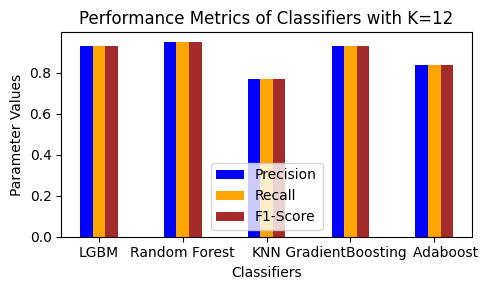

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def draw_side_by_side_bars(categories, param1_data, param2_data, param3_data):
    num_categories = len(categories)
    bar_width = 0.15
    index = np.arange(num_categories)
    colors = ['blue','orange','brown']
    plt.figure(figsize=(5,3))
    plt.bar(index - bar_width, param1_data, bar_width, color=colors[0], label='Precision')
    plt.bar(index, param2_data, bar_width, color=colors[1], label='Recall')
    plt.bar(index + bar_width, param3_data, bar_width, color=colors[2], label='F1-Score')
    plt.xlabel('Classifiers')
    plt.ylabel('Parameter Values')
    plt.title('Performance Metrics of Classifiers with K=12')
    plt.xticks(index, categories)
    plt.legend()
    plt.tight_layout()
    plt.show()
clf=["LGBM","Random Forest","KNN"," GradientBoosting   ","     Adaboost"]
Precision = [0.93,0.95,0.77,0.93,0.84]
Recall = [0.93,0.95,0.77,0.93,0.84]
F1_Score =[0.93,0.95,0.77,0.93,0.84]
draw_side_by_side_bars(clf, Precision, Recall, F1_Score)

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

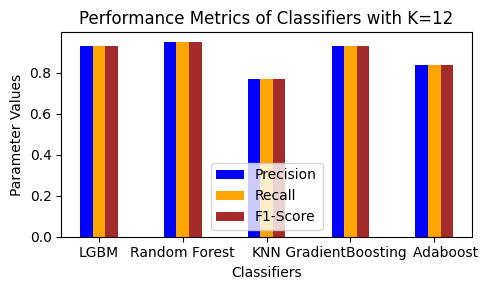

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,3))
def draw_side_by_side_bars(categories, param1_data, param2_data, param3_data):
    num_categories = len(categories)
    bar_width = 0.15
    index = np.arange(num_categories)
    colors = ['blue','orange','brown']
    plt.figure(figsize=(5,3))
    plt.bar(index - bar_width, param1_data, bar_width, color=colors[0], label='Precision')
    plt.bar(index, param2_data, bar_width, color=colors[1], label='Recall')
    plt.bar(index + bar_width, param3_data, bar_width, color=colors[2], label='F1-Score')
    plt.xlabel('Classifiers')
    plt.ylabel('Parameter Values')
    plt.title('Performance Metrics of Classifiers with K=12')
    plt.xticks(index, categories)
    plt.legend()
    plt.tight_layout()
    plt.show()
plt.figure(figsize=(5,3))
clf=["LGBM","Random Forest","KNN"," GradientBoosting   ","     Adaboost"]
Precision = [0.93,0.95,0.77,0.93,0.84]
Recall = [0.93,0.95,0.77,0.93,0.84]
F1_Score =[0.93,0.95,0.77,0.93,0.84]
draw_side_by_side_bars(clf, Precision, Recall, F1_Score)


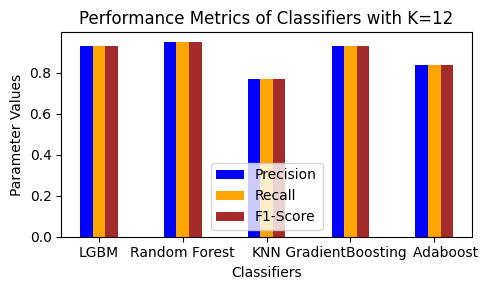

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def draw_side_by_side_bars(categories, param1_data, param2_data, param3_data):
    num_categories = len(categories)
    bar_width = 0.15
    index = np.arange(num_categories)
    colors = ['blue','orange','brown']
    plt.figure(figsize=(5,3))
    plt.bar(index - bar_width, param1_data, bar_width, color=colors[0], label='Precision')
    plt.bar(index, param2_data, bar_width, color=colors[1], label='Recall')
    plt.bar(index + bar_width, param3_data, bar_width, color=colors[2], label='F1-Score')
    plt.xlabel('Classifiers')
    plt.ylabel('Parameter Values')
    plt.title('Performance Metrics of Classifiers with K=12')
    plt.xticks(index, categories)
    plt.legend()
    plt.tight_layout()
    plt.show()
clf=["LGBM","Random Forest","KNN"," GradientBoosting   ","     Adaboost"]
Precision = [0.93,0.95,0.77,0.93,0.84]
Recall = [0.93,0.95,0.77,0.93,0.84]
F1_Score =[0.93,0.95,0.77,0.93,0.84]
draw_side_by_side_bars(clf, Precision, Recall, F1_Score)

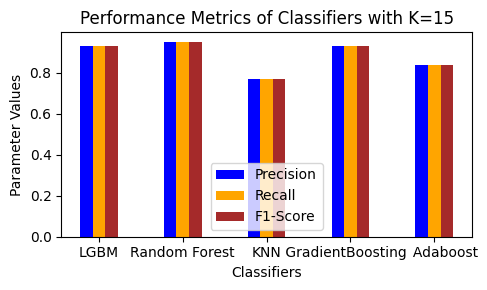

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def draw_side_by_side_bars(categories, param1_data, param2_data, param3_data):
    num_categories = len(categories)
    bar_width = 0.15
    index = np.arange(num_categories)
    colors = ['blue','orange','brown']
    plt.figure(figsize=(5,3))
    plt.bar(index - bar_width, param1_data, bar_width, color=colors[0], label='Precision')
    plt.bar(index, param2_data, bar_width, color=colors[1], label='Recall')
    plt.bar(index + bar_width, param3_data, bar_width, color=colors[2], label='F1-Score')
    plt.xlabel('Classifiers')
    plt.ylabel('Parameter Values')
    plt.title('Performance Metrics of Classifiers with K=15')
    plt.xticks(index, categories)
    plt.legend()
    plt.tight_layout()
    plt.show()
clf=["LGBM","Random Forest","KNN"," GradientBoosting   ","     Adaboost"]
Precision = [0.93,0.95,0.77,0.93,0.84]
Recall = [0.93,0.95,0.77,0.93,0.84]
F1_Score =[0.93,0.95,0.77,0.93,0.84]
draw_side_by_side_bars(clf, Precision, Recall, F1_Score)